In [4]:
import astropy
import numpy as np
import matplotlib
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
import pandas as pd
plt.style.use(astropy_mpl_style)
import matplotlib.image as mpimg

%matplotlib inline

In [5]:
file = fits.open('/Users/FRANNYPACK/Downloads/grind!/research data/FITS/MW_foreground_askap_parkes_PBC_K.fits')
file.info()
file[0].header

Filename: /Users/FRANNYPACK/Downloads/grind!/research data/FITS/MW_foreground_askap_parkes_PBC_K.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU   13495   (3901, 3471, 84)   float32   


SIMPLE  =                    T  /                                               
BITPIX  =                  -32  /                                               
NAXIS   =                    3  /                                               
NAXIS1  =                 3901  /                                               
NAXIS2  =                 3471  /                                               
NAXIS3  =                   84  /                                               
EXTEND  =                    T  /                                               
BSCALE  =    1.00000000000E+00  /                                               
BZERO   =    0.00000000000E+00  /                                               
BLANK   =                   -1  /                                               
BUNIT   = 'K       '  /                                                         
DATE-OBS= '2019-12-22T06:12:09.7'  /                                            
TELESCOP= 'ASKAP   '  /     

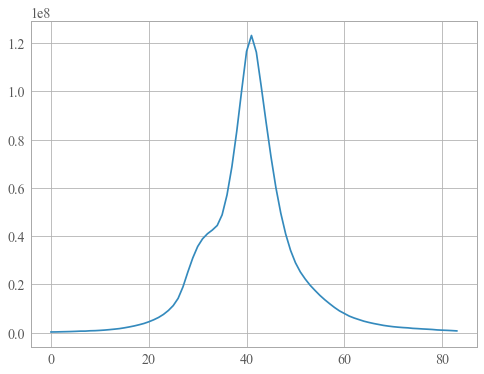

In [33]:
file[0].data[file[0].data == -32786] = np.nan
sum_data = np.nansum(np.nansum(file[0].data, axis = 1), axis = 1)
plt.plot(sum_data) # plot of brightness intensity vs velocity

In [3]:
# flattening the 3D cube into 2D column density map by integrating along z-axis (velocity)
file[0].data[file[0].data == -32786] = np.nan
tot_col_dens = 1.82 * (10 ** 15) * np.nansum(file[0].data, axis = 0)

In [235]:
print(tot_col_dens)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [151]:
# function to plot column density given a range of velocities
def get_col_dens(file_name, title, subtitle):
    wcs = WCS(file[0].header)
    ax = plt.subplot(projection = wcs, slices = ['x','y',1], zorder = -1) # (slices isn't doing anything here)
    plt.grid(b = True, which = 'major', axis = 'both', linewidth = 1, color = 'white', zorder = -1)
    plt.xlabel('Right Ascension', fontname = 'Times New Roman', fontsize = 20)
    plt.ylabel('Declination', fontname = 'Times New Roman', fontsize = 20)
    plt.title(title, y = 1.06, fontname = 'Times New Roman', fontsize = 22)
    plt.suptitle(subtitle, x = 0.45, y = 0.94, fontsize = 12)
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['text.color'] = 'Black'
    plt.rcParams['font.size'] = '14'
    plt.imshow(file_name, cmap = 'magma', vmin = -0.25 * 10 ** 18, vmax = 0.73 * 10 ** 18, zorder = -1)
    plt.colorbar()

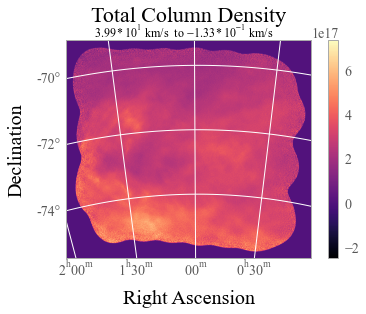

In [33]:
# column density over all the velocity ranges 

get_col_dens(tot_col_dens, 'Total Column Density', '$\mathregular{3.99 * 10^{1}}$ km/s  to $\mathregular{-1.33 * 10^{-1}}$ km/s')

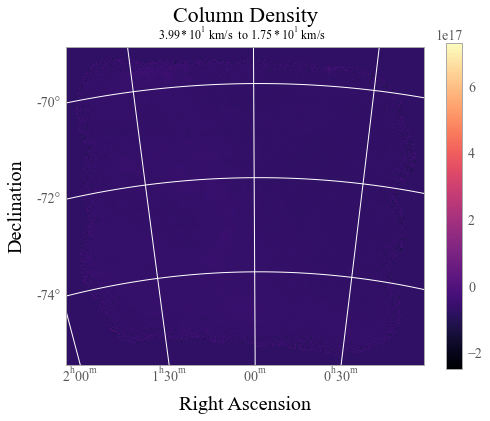

In [363]:
# column density over 3.99 * 10^1 km/s to 1.75 * 10^1 km/s (0th to 22rd index)
# region of velocities where filamentary structures not prominent at all!

col_dens1 = 1.82 * (10 ** 15) * np.nansum(file[0].data[0:22], axis = 0)
get_col_dens(col_dens1, 'Column Density', '$\mathregular{3.99 * 10^{1}}$ km/s  to $\mathregular{1.75 * 10^{1}}$ km/s')
plt.imshow(col_dens1, cmap = 'magma', vmin = -1.5 * 10 ** 17, vmax = 7 * 10 ** 17)

# is the same color throughout no matter the range set

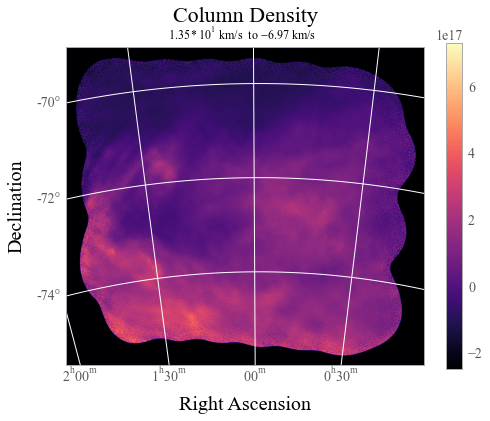

In [370]:
# column density over 1.35 * 10^1 km/s to -6.97 km/s (25th to 44th index)
# region of velocities where MANY filamentary structures come into play

col_dens1 = 1.82 * (10 ** 15) * np.nansum(file[0].data[25:44], axis = 0)
get_col_dens(col_dens1, 'Column Density', '$\mathregular{1.35 * 10^{1}}$ km/s  to $\mathregular{-6.97}$ km/s')
plt.imshow(col_dens1, cmap = 'magma', vmin = 0, vmax = 6 * 10 ** 17)

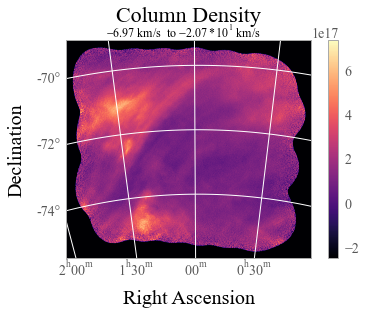

In [152]:
# column density over -6.97 km/s to -2.07 * 10^1 km/s (44th to 59th index)
# region of velocities where filamentary structures not very prominent

col_dens1 = 1.82 * (10 ** 15) * np.nansum(file[0].data[44:59], axis = 0)
get_col_dens(col_dens1, 'Column Density', '$\mathregular{-6.97}$ km/s  to $\mathregular{-2.07 * 10^{1}}$ km/s')
plt.imshow(col_dens1, cmap = 'magma', vmin = -2, vmax = 2 * 10 ** 17)

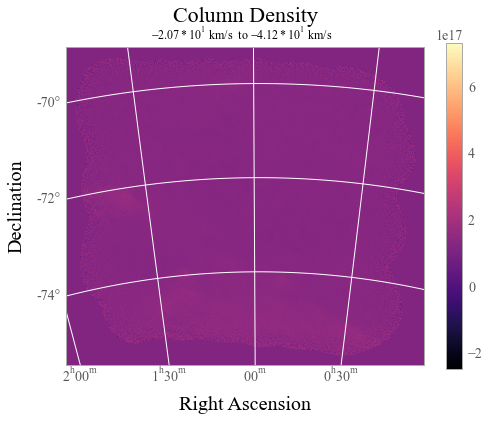

In [388]:
# column density over -2.07 * 10^1 km/s to -4.12 * 10^1 km/s (44th to 59th index)
# region of velocities where filamentary structures not prominent at all!

col_dens1 = 1.82 * (10 ** 15) * np.nansum(file[0].data[59:84], axis = 0)
get_col_dens(col_dens1, 'Column Density', '$\mathregular{-2.07 * 10^{1}}$ km/s  to $\mathregular{-4.12 * 10^{1}}$ km/s')
plt.imshow(col_dens1, cmap = 'magma', vmin = -3 * 10 ** 17, vmax = 5 * 10 ** 17)

# is the same color throughout no matter the range set

In [20]:
# information from the absorption line data file

s_file = pd.read_csv('/Users/FRANNYPACK/Downloads/grind!/research data/FUSE_output.csv')
print(s_file)

                    Target     RA_FK5    DEC_FK5 Galaxy    SpecType  \
0                    AV104  12.910521 -72.801528    SMC      B0.5Ia   
1                    AV135  13.206333 -72.140722    SMC       O7III   
2                     AV14  11.636083 -73.101556    SMC       O3-4V   
3                     AV15  11.675792 -73.415194    SMC        O7II   
4                    AV170  13.926992 -73.291675    SMC     O9.7III   
5                    AV207  14.638292 -71.929583    SMC         O7V   
6                    AV208  14.638250 -72.658778    SMC         NaN   
7                    AV215  14.731708 -72.535583    SMC        B0Ia   
8                    AV216  14.746588 -72.742706    SMC       B1III   
9                    AV220  14.792108 -72.096689    SMC     O6.5?fp   
10                   AV243  15.028333 -72.788611    SMC         O6V   
11                   AV255  15.175458 -71.520361    SMC         O9V   
12                    AV26  11.958625 -73.139083    SMC       O7III   
13    

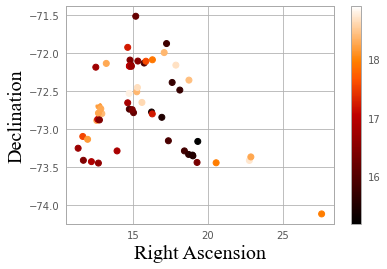

In [21]:
# graph of absorption line data as a function of sky position

x = s_file['RA_FK5']
y = s_file['DEC_FK5']
brightness = s_file['log10_N_MW']
def s_graph():
    plt.scatter(x, y, marker = 'o', c = brightness, zorder = 1)
    plt.colorbar()
    plt.xlabel('Right Ascension', fontname = 'Times New Roman', fontsize = 20)
    plt.ylabel('Declination', fontname = 'Times New Roman', fontsize = 20)
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['text.color'] = 'Black'
    plt.rcParams['font.size'] = '14'
    
s_graph()

In [10]:
# make 2D header (using Prof. Clark's data)

def make_flat_hdr(file):
    hdr = file[0].header
    
    # Make a 2D header 
    flathdr = fits.Header()
    flathdr["NAXIS   "] = 2
    flathdr["NAXIS1  "] = hdr["NAXIS1  "]
    flathdr["NAXIS2  "] = hdr["NAXIS2  "]
    flathdr["CRPIX1  "] = hdr["CRPIX1  "]
    flathdr["CRPIX2  "] = hdr["CRPIX2  "]
    flathdr["CRVAL1  "] = hdr["CRVAL1  "]
    flathdr["CRVAL2  "] = hdr["CRVAL2  "]
    flathdr["CDELT1  "] = hdr["CDELT1  "]
    flathdr["CDELT2  "] = hdr["CDELT2  "]
    flathdr["CTYPE1  "] = hdr["CTYPE1  "]
    flathdr["CTYPE2  "] = hdr["CTYPE2  "]
    flathdr["LONPOLE "] = hdr["LONPOLE "]
    flathdr["LATPOLE "] = hdr["LATPOLE "]
    
    return flathdr

In [11]:
file_flat_hdr = make_flat_hdr(file)

In [71]:
# creates grid of (ra, dec) values corresponding to each pixel
def coordinate_4_pix(flat_hdr): 
    NAXIS1 = flat_hdr["NAXIS1"]
    NAXIS2 = flat_hdr["NAXIS2"]
    x = np.arange(NAXIS1)
    y = np.arange(NAXIS2)
    X, Y = np.meshgrid(x, y) # return coordinate matrices from coordinate vectors
    w = WCS(flat_hdr)
    ra, dec = w.wcs_pix2world(X, Y, 0)# turns pixel coordinates into world coordinates
    coords = np.dstack((ra,dec)) # stack arrays in sequence along 3rd axis
    return coords

In [72]:
coords = coordinate_4_pix(file_flat_hdr)

In [14]:
cube_integrated = np.nansum(file[0].data, axis = 0) # FITS file integrated along velocity axis

In [144]:
# function to plot the absorption line data on top of specific channel maps
def chan_map_abs_plt(coordinates, cube, subtitle):
    fig = plt.figure(figsize = (10,7))
    image = plt.pcolormesh(coordinates[:, :, 0], coordinates[:, :, 1], cube, vmin = -50, vmax = 270, shading = 'auto', cmap = 'magma')
    scatter_pts = plt.scatter(x, y, c = brightness, cmap = 'Blues')
    plt.colorbar(scatter_pts, label='N(H$_2$)')
    plt.colorbar(image)
    plt.xlabel('Right Ascension', fontname = 'Times New Roman', fontsize = 20)
    plt.ylabel('Declination', fontname = 'Times New Roman', fontsize = 20)
    plt.title('Absorption Line Measurements on $N_H$ Map', y = 1.06, fontname = 'Times New Roman', fontsize = 22)
    plt.suptitle(subtitle, x = 0.36, y = 0.93, fontsize = 14)

/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_7459/3792119462.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  image = plt.pcolormesh(coordinates[:, :, 0], coordinates[:, :, 1], cube, vmin = -50, vmax = 270, shading = 'auto', cmap = 'magma')


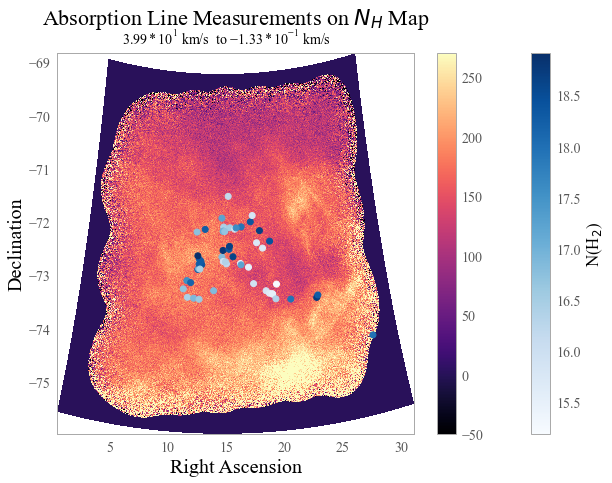

In [141]:
# plots abs line data atop of ALL data
chan_map_abs_plt(coords, cube_integrated, '$\mathregular{3.99 * 10^{1}}$ km/s  to $\mathregular{-1.33 * 10^{-1}}$ km/s')

In [130]:
cube_25_44 = np.nansum(file[0].data[25:44], axis = 0)

/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_7459/827972096.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  image = plt.pcolormesh(coordinates[:, :, 0], coordinates[:, :, 1], cube, vmin = -50, vmax = 270, shading = 'auto', cmap = 'magma')


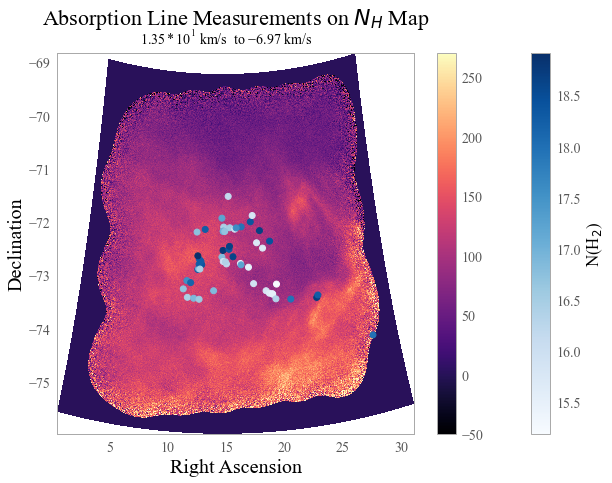

In [153]:
#plots abs line data atop on channel map from v = 1.35 * 10^1 km/s to -6.97 km/s

chan_map_abs_plt(coords, cube_25_44, '$\mathregular{1.35 * 10^{1}}$ km/s  to $\mathregular{-6.97}$ km/s')

In [166]:
cube_44_59 = np.nansum(file[0].data[44:59], axis = 0)

/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_7459/827972096.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  image = plt.pcolormesh(coordinates[:, :, 0], coordinates[:, :, 1], cube, vmin = -50, vmax = 270, shading = 'auto', cmap = 'magma')


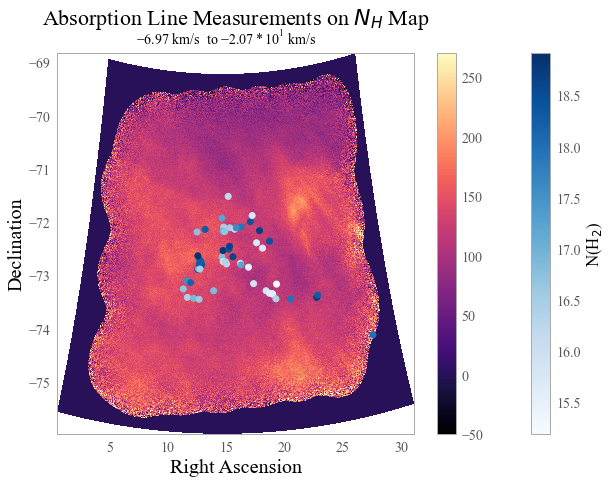

In [168]:
#plots abs line data atop on channel map from v = -6.97 km/s to -2.07 * 10^1 km/s

chan_map_abs_plt(coords, cube_44_59, '$\mathregular{-6.97}$ km/s  to $\mathregular{-2.07 * 10^{1}}$ km/s')


In [176]:
cube_50_84 = np.nansum(file[0].data[50:84], axis = 0)

/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_7459/827972096.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  image = plt.pcolormesh(coordinates[:, :, 0], coordinates[:, :, 1], cube, vmin = -50, vmax = 270, shading = 'auto', cmap = 'magma')


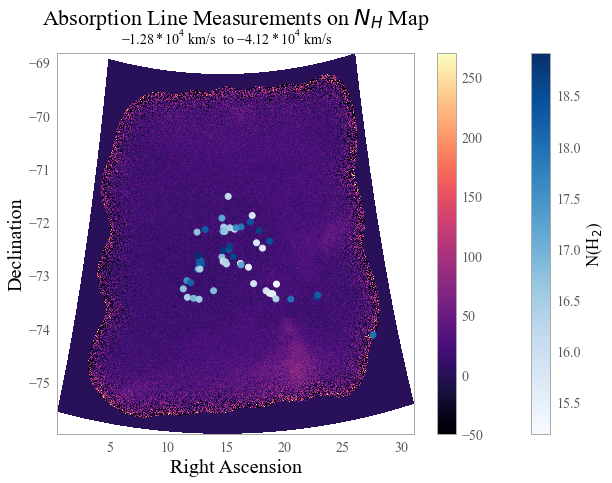

In [178]:
#plots abs line data atop on channel map from v = -1.28 * 10^4 km/s to -4.12 * 10^4 km/s

chan_map_abs_plt(coords, cube_50_84, '$\mathregular{-1.28 * 10^{4}}$ km/s  to $\mathregular{-4.12 * 10^{4}}$ km/s')
